In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta

In [2]:
customer_data = pd.read_csv("CustomerAcqusition.csv")

In [3]:
tran_data = pd.read_csv("spend.csv")

In [4]:
repayment_data = pd.read_csv("Repayment.csv")

In [5]:
customer_data.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [7]:
customer_data.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [8]:
# dropping the No column
customer_data.drop('No', axis=1, inplace=True)

In [9]:
customer_data['Product']=customer_data['Product'].replace('Platimum', 'Platinum')

In [10]:
customer_data.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platinum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platinum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platinum,10002.0,C5,Normal Salary


In [11]:
tran_data.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [12]:
tran_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [13]:
# dropping the Sl No. column
tran_data.drop('Sl No:', axis=1, inplace=True)

In [14]:
#changing the month data from object to date time
tran_data['Month']=tran_data['Month'].apply(lambda x: pd.to_datetime(x))

In [15]:
tran_data.head()

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46
3,A1,2004-01-25,FOOD,484342.47
4,A1,2005-01-17,CAMERA,369694.07


In [16]:
tran_data.isnull().sum()

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [17]:
repayment_data.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [18]:
repayment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SL No:      1499 non-null   float64
 1   Customer    1500 non-null   object 
 2   Month       1500 non-null   object 
 3   Amount      1500 non-null   float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 59.6+ KB


In [19]:
#dropping the Sl No and Unnamed:4 column from the data
repayment_data.drop(['SL No:','Unnamed: 4'], axis=1, inplace=True)

In [20]:
#changing the month data from object to date time
repayment_data['Month']=repayment_data['Month'].apply(lambda x: pd.to_datetime(x))

In [21]:
repayment_data.isnull().sum()

Customer    23
Month       23
Amount      23
dtype: int64

In [22]:
#dropping the rwo which contains the missing values
repayment_data.dropna(axis=0,inplace=True)

In [23]:
repayment_data.isnull().sum()

Customer    0
Month       0
Amount      0
dtype: int64

In [24]:
print(customer_data.shape)
print(repayment_data.shape)
print(tran_data.shape)

(100, 7)
(1500, 3)
(1500, 4)



# Q1


1.(a)

In [25]:
mean_age = customer_data['Age'].mean()
print("The mean of Age column is",mean_age)

The mean of Age column is 46.49


In [26]:
# replaceing age less than 18 with mean age

customer_data.loc[customer_data['Age'] < 18, 'Age'] = mean_age

In [27]:
new_mean = customer_data['Age'].mean()
print('The new mean of Age column is', new_mean)

The new mean of Age column is 48.39940000000001


1.(b)

In [28]:
customer_data.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34.0,COCHIN,Platinum,10000.0,C3,Salaried_Pvt
3,A4,47.0,BOMBAY,Platinum,10001.0,C4,Govt
4,A5,56.0,BANGALORE,Platinum,10002.0,C5,Normal Salary


In [29]:
tran_data.head()

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46
3,A1,2004-01-25,FOOD,484342.47
4,A1,2005-01-17,CAMERA,369694.07


In [30]:
customer_spend_amount = pd.merge(left=customer_data, right=tran_data, on='Customer')

In [31]:
customer_spend_amount

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66
1496,A97,58.0,TRIVANDRUM,Platinum,10000.0,C20,Govt,2004-01-12,AUTO,139018.26
1497,A98,51.0,CALCUTTA,Platinum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,284521.06
1498,A99,35.0,CALCUTTA,Platinum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,90184.22


In [32]:
customer_spend_amount['Amount'] = np.where(customer_spend_amount.Amount > customer_spend_amount.Limit, customer_spend_amount.Limit * 0.5, customer_spend_amount.Amount)

In [33]:
customer_spend_amount

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66
1496,A97,58.0,TRIVANDRUM,Platinum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00
1497,A98,51.0,CALCUTTA,Platinum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50
1498,A99,35.0,CALCUTTA,Platinum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00


1(c)

In [34]:
customer_data.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34.0,COCHIN,Platinum,10000.0,C3,Salaried_Pvt
3,A4,47.0,BOMBAY,Platinum,10001.0,C4,Govt
4,A5,56.0,BANGALORE,Platinum,10002.0,C5,Normal Salary


In [35]:
repayment_data.head()

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88


In [36]:
customer_repay_amount = pd.merge(left=customer_data, right=repayment_data, on='Customer')

In [37]:
customer_repay_amount.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88


In [38]:
customer_repay_amount['Amount'] = np.where(customer_repay_amount.Amount > customer_repay_amount.Limit, customer_repay_amount.Limit, customer_repay_amount.Amount )

In [39]:
customer_repay_amount.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88


# Q2

2(a)

In [40]:
unique_customer = customer_data['Customer'].nunique()
print('Number of Distinct Customers are', unique_customer)


Number of Distinct Customers are 100



2(b)

In [41]:
unique_product = customer_repay_amount['Product'].nunique()
print('Number of Distinct Products are', unique_product)

Number of Distinct Products are 3


In [42]:
unique_city = customer_repay_amount['City'].nunique()
print('Number of Distinct Products are', unique_city)

Number of Distinct Products are 8


In [43]:
unique_segment = customer_repay_amount['Segment'].nunique()
print('Number of Distinct Products are', unique_segment)

Number of Distinct Products are 5


In [44]:
unique_type = customer_spend_amount['Type'].nunique()
print('Number of Distinct Products are', unique_type)

Number of Distinct Products are 15



2(c)

In [45]:
monthly_spend_amount = customer_spend_amount.groupby(['Customer','Month'])['Amount'].mean().reset_index()

In [46]:
monthly_spend_amount['Spent_Month'] = monthly_spend_amount['Month'].apply(lambda x: x.month)

In [47]:
Avg_monthly_spend = monthly_spend_amount.groupby(['Customer', 'Spent_Month'])['Amount'].mean().reset_index()

In [48]:
Avg_monthly_spend.head(10)

,Customer,Spent_Month,Amount
0,A1,1,341332.877000
1,A1,2,138421.151250
2,A1,4,261649.250000
3,A1,5,361141.310000
4,A1,8,344372.100000
5,A1,10,244534.680000
6,A1,11,183839.610000
7,A10,1,173828.282500
8,A10,2,170265.770000
9,A10,3,134631.266667



2(d)

In [49]:
monthly_repay_amount = customer_repay_amount.groupby(['Customer','Month'])['Amount'].mean().reset_index()

In [50]:
monthly_repay_amount['Repayment_Month'] = monthly_repay_amount['Month'].apply(lambda x:x.month)

In [51]:
Avg_monthly_repay = monthly_repay_amount.groupby(['Customer', 'Repayment_Month'])['Amount'].mean().reset_index()

In [52]:
Avg_monthly_repay.head(10)

,Customer,Repayment_Month,Amount
0,A1,1,325723.331000
1,A1,2,137713.785000
2,A1,4,254474.580000
3,A1,7,297176.740000
4,A1,9,186427.500000
5,A1,11,285729.090000
6,A10,1,283324.721667
7,A10,2,217344.503333
8,A10,3,240130.543333
9,A10,4,120467.322500




2(e)

In [53]:
AvgMonthlyCustomers = pd.merge(left=Avg_monthly_spend, right=Avg_monthly_repay, on='Customer')

In [54]:
AvgMonthlyCustomers['Monthly_Profit']=AvgMonthlyCustomers.Amount_y-AvgMonthlyCustomers.Amount_x


In [55]:
AvgMonthlyCustomers['Profit']=np.where(AvgMonthlyCustomers['Monthly_Profit']>0,AvgMonthlyCustomers['Monthly_Profit']*2.9/100,np.nan)


In [56]:
AvgMonthlyCustomers.head(10)

,Customer,Spent_Month,Amount_x,Repayment_Month,Amount_y,Monthly_Profit,Profit
0,A1,1,341332.87700,1,325723.331,-15609.54600,NaN
1,A1,1,341332.87700,2,137713.785,-203619.09200,NaN
2,A1,1,341332.87700,4,254474.580,-86858.29700,NaN
3,A1,1,341332.87700,7,297176.740,-44156.13700,NaN
4,A1,1,341332.87700,9,186427.500,-154905.37700,NaN
5,A1,1,341332.87700,11,285729.090,-55603.78700,NaN
6,A1,2,138421.15125,1,325723.331,187302.17975,5431.763213
7,A1,2,138421.15125,2,137713.785,-707.36625,NaN
8,A1,2,138421.15125,4,254474.580,116053.42875,3365.549434
9,A1,2,138421.15125,7,297176.740,158755.58875,4603.912074




2(f)

In [57]:
tran_data.groupby('Type')['Amount'].sum().reset_index().sort_values('Amount', ascending=False).head(5)

,Type,Amount
10,PETRO,49863174.09
4,CAMERA,41481571.96
7,FOOD,37773338.43
14,TRAIN TICKET,33067077.15
0,AIR TICKET,32955445.42


In [58]:
top_product_types = customer_spend_amount['Type'].value_counts().head(5)

In [59]:
top_product_types

Type
PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: count, dtype: int64


2(g)

In [60]:
customer_spend_amount.groupby('City')['Amount'].sum().reset_index().sort_values('Amount', ascending=False).head(1)

,City,Amount
4,COCHIN,45963513.5


In [61]:
print('From the above table we can see that the COCHIN City is having maximum spend.')

From the above table we can see that the COCHIN City is having maximum spend.



2(h)

In [62]:
customer_spend_amount['Age_Group'] = np.where((customer_spend_amount['Age'].astype(int) >= 18) & (customer_spend_amount['Age'].astype(int) < 25),'Teenagers',np.where((customer_spend_amount['Age'].astype(int) >= 25) & (customer_spend_amount['Age'].astype(int) < 40),'Adult',np.where((customer_spend_amount['Age'].astype(int) >= 40) & (customer_spend_amount['Age'].astype(int) < 65),'Mid-Age', 'Old-Age')))

In [63]:
customer_spend_amount.groupby('Age_Group')['Amount'].sum().reset_index().sort_values('Amount', ascending=False).head(1)

,Age_Group,Amount
1,Mid-Age,92079385.52



2(i)

In [64]:
top_ten_customer = customer_repay_amount.groupby('Customer')['Amount'].sum().reset_index().sort_values('Amount', ascending=False).head(10)

In [65]:
top_ten_customer.reset_index(inplace = True)

In [66]:
top_ten_customer.drop(['index'], axis=1, inplace=True)

In [67]:
top_ten_customer.head(10)

,Customer,Amount
0,A61,10539142.91
1,A60,9876290.74
2,A13,9572000.66
3,A43,8489871.46
4,A45,8448334.87
5,A12,8334760.16
6,A14,7943268.63
7,A44,7744730.12
8,A39,7622483.30
9,A42,7615460.86


# Q3.

In [68]:
customer_spend_amount['Yearly_Spend'] = customer_spend_amount['Month'].apply(lambda x : x.year)

In [69]:
city_wise_spend = pd.pivot_table(data = customer_spend_amount, index='City', columns = ['Product', 'Yearly_Spend'], values='Amount', aggfunc='sum')

In [70]:
city_wise_spend

Product             Gold                              Platinum              \
Yearly_Spend        2004         2005         2006        2004        2005   
City                                                                         
BANGALORE     9289878.54  12892362.99  12030611.09  1112732.30   912284.97   
BOMBAY        6987853.53   8983018.28   7917144.31   897264.94   711804.94   
CALCUTTA      7477140.98  10303355.80  11167532.77  2037690.30  4434696.31   
CHENNAI       1059618.50   3740945.58   2704288.62  3535652.38  5053956.32   
COCHIN        7315850.15  12110613.03  10499142.38  3419904.07  4960921.71   
DELHI         2806495.00   1964845.27   2957103.32   283512.89   494157.86   
PATNA         2072567.90   3252615.77   2276181.69  1113069.60  2883231.07   
TRIVANDRUM    2415102.84   1240375.85   2735710.87  2161676.67  3601443.30   

Product                       Silver                         
Yearly_Spend        2006        2004       2005        2006  
City                                                         
BANGALORE      685831.27  1291852.58  830612.34  1415480.94  
BOMBAY         972130.01   532089.03  508988.54  1092833.80  
CALCUTTA      3589606.66   500006.00  440147.06  1157956.42  
CHENNAI       5024923.40   282056.86  377184.49   350009.50  
COCHIN        4920592.29   814229.62  652269.38  1269990.87  
DELHI          176788.72   768172.30  612311.21   854899.97  
PATNA         1256137.65   756684.10  950094.19   700005.00  
TRIVANDRUM    2147403.75   209667.48  269912.99   555862.12

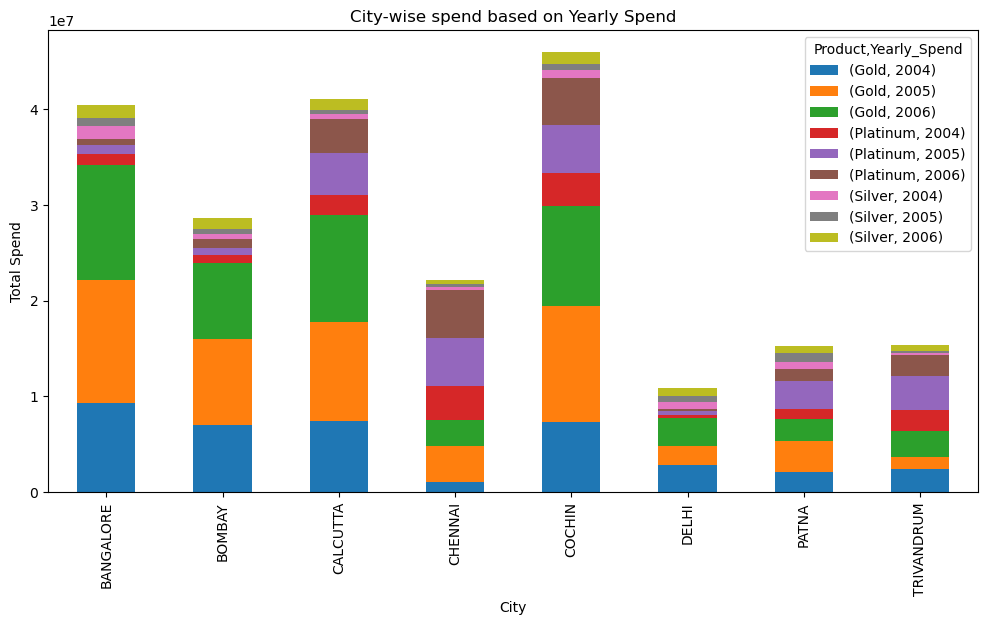

In [71]:
city_wise_spend.plot(kind='bar', stacked = True, figsize=(12, 6))
plt.title('City-wise spend based on Yearly Spend')
plt.ylabel('Total Spend')
plt.show()

# Q4

4(a)

In [72]:
customer_spend_amount['Monthly_Spend'] = customer_spend_amount['Month'].apply(lambda x:x.month)

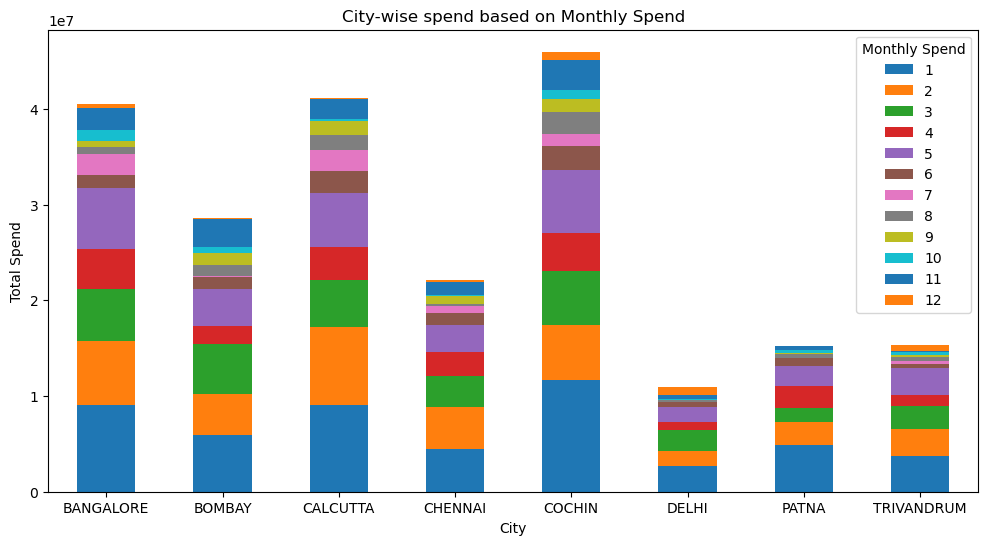

In [73]:
pd.pivot_table(data=customer_spend_amount, index='City', columns='Monthly_Spend', values='Amount', aggfunc='sum').plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('City-wise spend based on Monthly Spend')
plt.xlabel('City')
plt.ylabel('Total Spend')
plt.legend(title='Monthly Spend', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()

4(b)

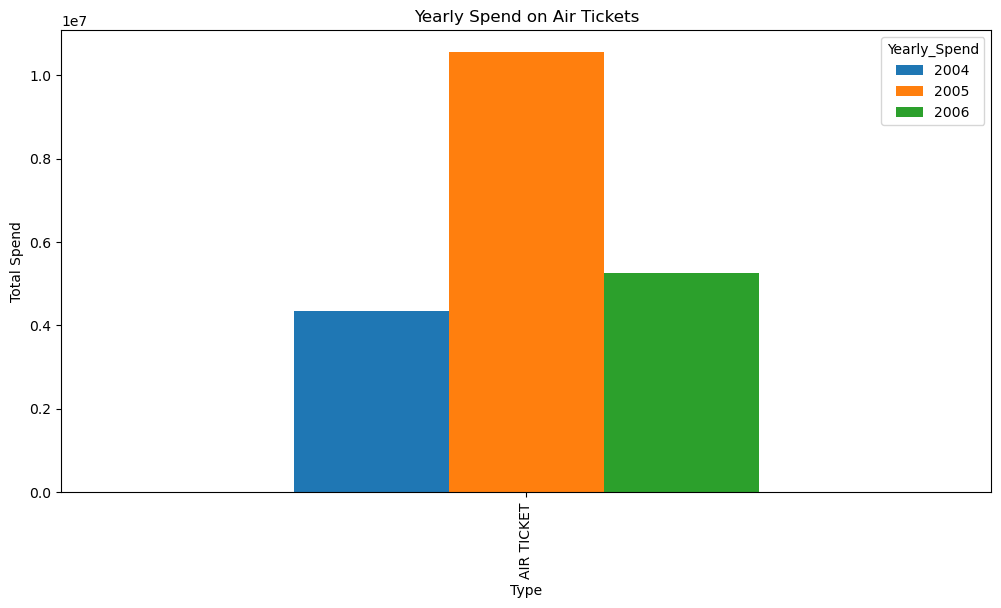

In [74]:
pd.pivot_table(data=customer_spend_amount[customer_spend_amount['Type']=='AIR TICKET'], index ='Type', columns='Yearly_Spend', values='Amount', aggfunc='sum').plot(kind='bar', figsize=(12,6))
plt.title('Yearly Spend on Air Tickets')
plt.xlabel('Type')
plt.ylabel('Total Spend')
plt.show()

4(c)

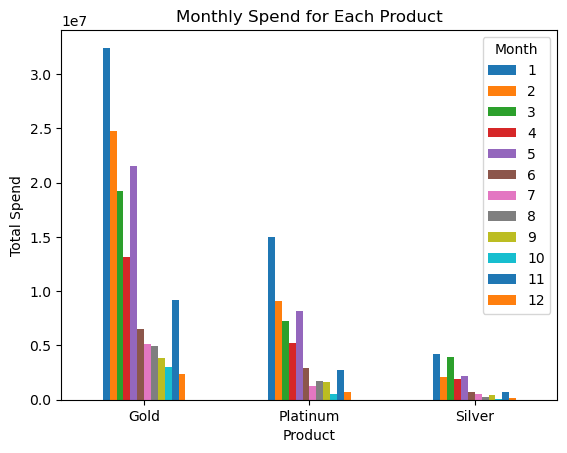

In [75]:
pd.pivot_table(data=customer_spend_amount, index='Product', columns='Monthly_Spend', values='Amount', aggfunc='sum').plot(kind='bar')
plt.title('Monthly Spend for Each Product')
plt.xlabel('Product')
plt.ylabel('Total Spend')
plt.legend(title='Month', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()

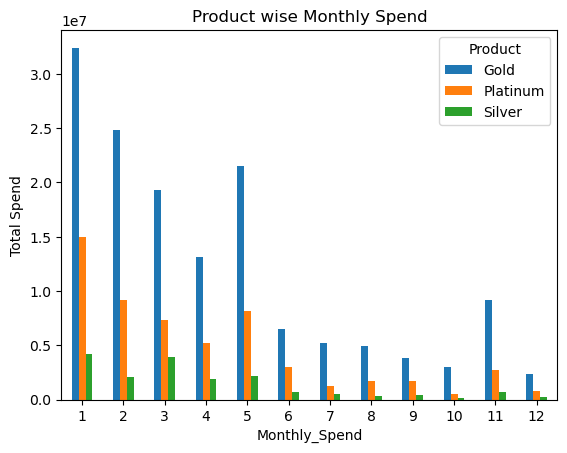

In [76]:
pd.pivot_table(data=customer_spend_amount, index='Monthly_Spend', columns='Product', values='Amount', aggfunc='sum').plot(kind='bar')
plt.title('Product wise Monthly Spend')
plt.xlabel('Monthly_Spend')
plt.ylabel('Total Spend')
plt.legend(title='Product', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()

# Q5


In [82]:
customer_repay_amount['Monthly'] = customer_repay_amount['Month'].dt.month
customer_repay_amount['Yearly'] = customer_repay_amount['Month'].dt.year

def top10Customers(product_category, time_period):
    if time_period.lower() == 'monthly':
        period_column = 'Monthly'
    elif time_period.lower() == 'yearly':
        period_column = 'Yearly'
    else:
        return "Invalid time period. Please enter 'Yearly' or 'Monthly'."

    return customer_repay_amount.loc[(customer_repay_amount['Product'] == product_category)].groupby(['Customer', 'City', 'Product', period_column])['Amount'].sum().reset_index().sort_values('Amount', ascending=False).head(10)

product_category = input("Please enter Product Category (Gold, Platinum, or Silver): ")
time_period = input("Please enter Time Period (Yearly or Monthly): ")

Top10Customers_Analysis = top10Customers(product_category, time_period)
Top10Customers_Analysis

Please enter Product Category (Gold, Platinum, or Silver): Platinum
Please enter Time Period (Yearly or Monthly): Yearly


,Customer,City,Product,Yearly,Amount
31,A39,TRIVANDRUM,Platinum,2005,3699578.97
74,A56,CHENNAI,Platinum,2006,3295868.87
68,A54,COCHIN,Platinum,2006,3255687.64
29,A38,CHENNAI,Platinum,2006,3111018.69
71,A55,PATNA,Platinum,2006,2874384.90
32,A39,TRIVANDRUM,Platinum,2006,2580401.17
36,A40,CALCUTTA,Platinum,2004,2576916.73
37,A40,CALCUTTA,Platinum,2005,2527720.55
40,A41,COCHIN,Platinum,2005,2486187.34
28,A38,CHENNAI,Platinum,2005,2408626.65
